In [1]:
%matplotlib inline
import numpy as np
from nicks_plot_utils import TH1D, TH2D
from lmfit import CompositeModel, Model
import matplotlib.pyplot as plt
import pandas as pd
import ROOT
from lmfit.models import *

Welcome to JupyROOT 6.22/09


In [2]:
mu = 2.0
sigma = 0.2
num = 10_000_000

data = pd.DataFrame({'W' : np.random.gumbel(mu, sigma, num),
                     'y' : np.random.normal(mu, sigma+0.1, num),
                     'z' : np.random.normal(mu, 0.5, num)})

In [3]:
# Wrapper around ROOT TH1 with some nice features
exRoot = TH1D("exRoot","Example of a ROOT Histogram", 250, 0., 5.)

In [4]:
# fill a ROOT histogram with an array
exRoot.fill(data.y)
exRoot.fill(data.z)
# exRoot.fill(data.W)

 FCN=210656 FROM MIGRAD    STATUS=CONVERGED      69 CALLS          70 TOTAL
                     EDM=5.09184e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     3.94508e+05   1.18015e+02   1.98725e+01   3.56148e-07
   2  Mean         2.00009e+00   8.99701e-05   2.01630e-05  -1.11501e+01
   3  Sigma        4.00229e-01   7.89822e-05   1.08984e-05  -1.20666e+00


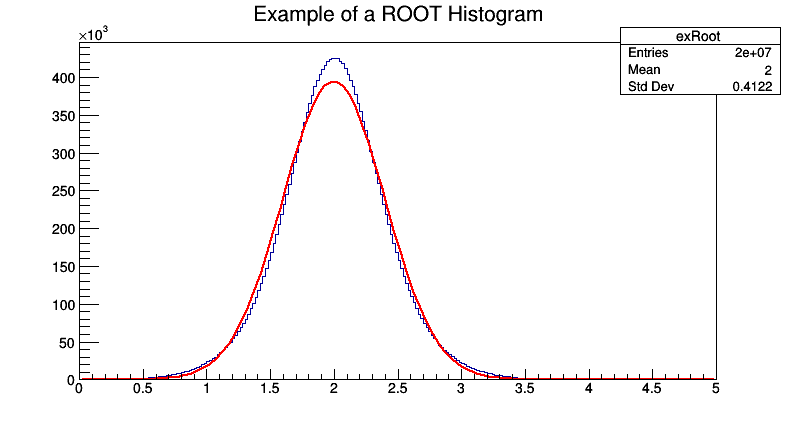

In [5]:
c1 = ROOT.TCanvas("c","c",800,450)
exRoot.Fit("gaus")
exRoot.Draw()
c1.Draw()

In [6]:
hist = exRoot.toScatter()

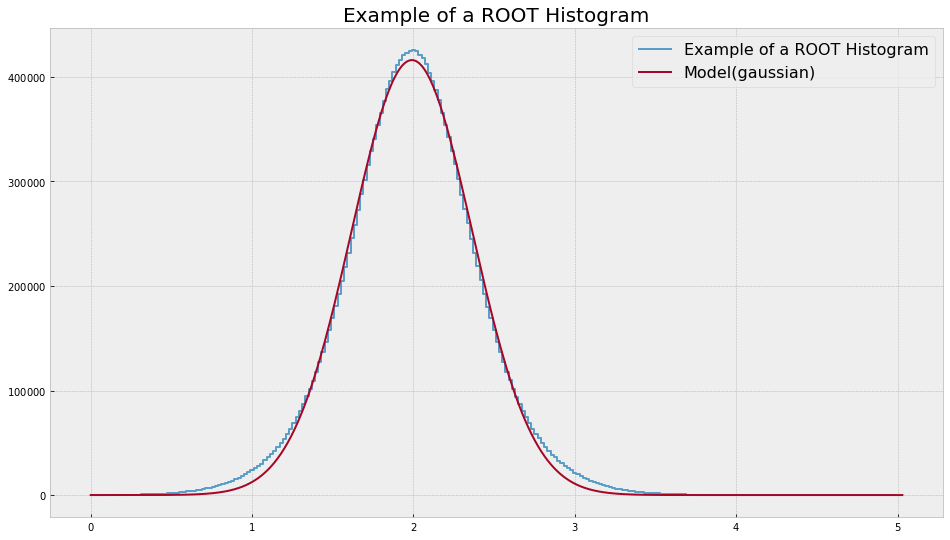

In [7]:
hist.histogram()
out = hist.fitGaussian()
plt.show()

out